## Importância de Variáveis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Leitura dos dados

In [3]:
df = pd.read_csv('./dados/feat_imp.csv')

In [4]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1,1


#### Separação entre X e y

In [5]:
X = df.drop('Exited', axis=1)
y = df.Exited

X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [6]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

#### Divisão da base em conjuntos de treino e teste

In [7]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=.3, random_state=61658)

In [8]:
X_treino

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9057,704,33,0,130499.09,2,1,1,74804.36,1,0,0,1,0
81,777,32,2,0.00,1,1,0,136458.19,1,0,0,1,0
3433,587,37,6,104414.03,1,1,0,192026.02,0,1,0,1,0
1768,760,28,1,141038.57,2,0,0,16287.38,0,0,1,0,1
1888,429,60,7,0.00,2,1,1,163691.48,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,648,33,5,138664.24,1,1,0,29076.27,0,1,0,0,1
9637,790,31,2,151290.16,1,1,1,172437.12,1,0,0,1,0
8675,714,54,7,126113.28,1,1,0,112777.38,1,0,0,0,1
8806,681,38,6,181804.34,2,1,1,57517.71,0,1,0,0,1


#### Definição dos valores de Validação cruzada

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [10]:
params = {
    'max_leaf_nodes' : [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048],
    'criterion'      : ['gini', 'entropy']
}

In [11]:
grid = GridSearchCV(
    DecisionTreeClassifier(random_state=61658), #primeiro argumento: Modelo
    params,                                     #segundo argumento: Parâmetros
    cv=10,                                      #argumento CV: quantidade de folds
    scoring='roc_auc',                          #argumento Scoring: métrica
    verbose=5                                   #argumento Verbose: mostra na tela 
)

#### Encontra os melhores parâmetros nos dados de treino por Validação Cruzada:

In [12]:
grid.fit(X_treino, y_treino)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10] END .criterion=gini, max_leaf_nodes=4;, score=0.756 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=4;, score=0.731 total time=   0.0s
[CV 3/10] END .criterion=gini, max_leaf_nodes=4;, score=0.756 total time=   0.0s
[CV 4/10] END .criterion=gini, max_leaf_nodes=4;, score=0.757 total time=   0.0s
[CV 5/10] END .criterion=gini, max_leaf_nodes=4;, score=0.762 total time=   0.0s
[CV 6/10] END .criterion=gini, max_leaf_nodes=4;, score=0.738 total time=   0.0s
[CV 7/10] END .criterion=gini, max_leaf_nodes=4;, score=0.715 total time=   0.0s
[CV 8/10] END .criterion=gini, max_leaf_nodes=4;, score=0.726 total time=   0.0s
[CV 9/10] END .criterion=gini, max_leaf_nodes=4;, score=0.730 total time=   0.0s
[CV 10/10] END criterion=gini, max_leaf_nodes=4;, score=0.756 total time=   0.0s
[CV 1/10] END .criterion=gini, max_leaf_nodes=8;, score=0.818 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=

[CV 5/10] END criterion=entropy, max_leaf_nodes=8;, score=0.817 total time=   0.0s
[CV 6/10] END criterion=entropy, max_leaf_nodes=8;, score=0.803 total time=   0.0s
[CV 7/10] END criterion=entropy, max_leaf_nodes=8;, score=0.798 total time=   0.0s
[CV 8/10] END criterion=entropy, max_leaf_nodes=8;, score=0.805 total time=   0.0s
[CV 9/10] END criterion=entropy, max_leaf_nodes=8;, score=0.781 total time=   0.0s
[CV 10/10] END criterion=entropy, max_leaf_nodes=8;, score=0.814 total time=   0.0s
[CV 1/10] END criterion=entropy, max_leaf_nodes=16;, score=0.826 total time=   0.0s
[CV 2/10] END criterion=entropy, max_leaf_nodes=16;, score=0.833 total time=   0.0s
[CV 3/10] END criterion=entropy, max_leaf_nodes=16;, score=0.832 total time=   0.0s
[CV 4/10] END criterion=entropy, max_leaf_nodes=16;, score=0.861 total time=   0.0s
[CV 5/10] END criterion=entropy, max_leaf_nodes=16;, score=0.831 total time=   0.0s
[CV 6/10] END criterion=entropy, max_leaf_nodes=16;, score=0.836 total time=   0.

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=61658),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [4, 8, 16, 32, 64, 128, 256, 512,
                                            1024, 2048]},
             scoring='roc_auc', verbose=5)

#### Qual foi o melhor parâmetro/modelo?

In [13]:
grid.best_params_

{'criterion': 'entropy', 'max_leaf_nodes': 32}

#### Qual foi o melhor score médio?

In [14]:
grid.best_score_

0.844584741625602

### Vamos usar o modelo no conjunto TESTE para ver se está bom

In [15]:
y_pred = grid.predict_proba(X_teste)
display(y_pred)

print("Deixando somente a coluna com os '1'")

y_pred = grid.predict_proba(X_teste)[:,1]
y_pred

array([[0.97933001, 0.02066999],
       [0.93684211, 0.06315789],
       [0.92800789, 0.07199211],
       ...,
       [0.79723502, 0.20276498],
       [0.97933001, 0.02066999],
       [0.97933001, 0.02066999]])

Deixando somente a coluna com os '1'


array([0.02066999, 0.06315789, 0.07199211, ..., 0.20276498, 0.02066999,
       0.02066999])

### Curva ROC

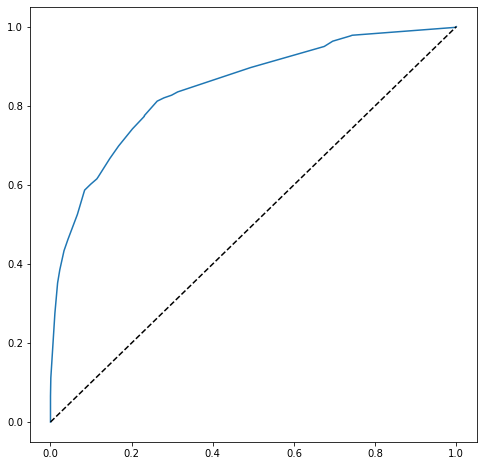

In [16]:
from sklearn.metrics import roc_curve

fpr, tpr, ths = roc_curve(y_teste, y_pred)

# fpr = false positive rate (eixo x)
# tpr = true positive rate (eixo y)
# ths = quais limiares ele testou 

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr)
plt.plot((0,1), (0,1), 'k--')

### ROC/AUC score

In [17]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_teste, y_pred)

0.8461416666666665

In [18]:
grid.best_score_

0.844584741625602

### E no conjunto de Treino?

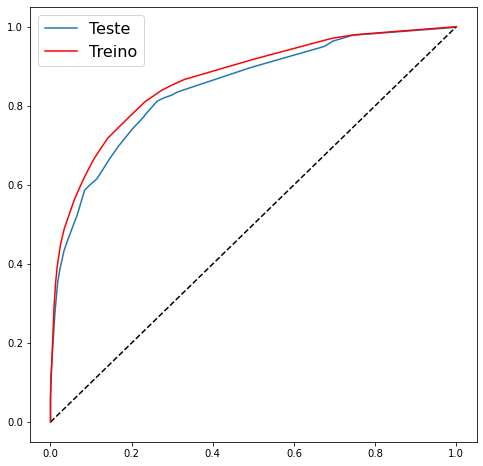

In [19]:
from sklearn.metrics import roc_curve

fpr, tpr, ths = roc_curve(y_teste, y_pred)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='Teste')
plt.plot((0,1), (0,1), 'k--')

fpr2, tpr2, ths2 = roc_curve(y_treino, grid.predict_proba(X_treino)[:,1])

plt.plot(fpr2, tpr2, label = 'Treino', color='r')

plt.legend(fontsize=16)

### Visualização da árvore

In [20]:
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=61658),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [4, 8, 16, 32, 64, 128, 256, 512,
                                            1024, 2048]},
             scoring='roc_auc', verbose=5)

In [21]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=32,
                       random_state=61658)

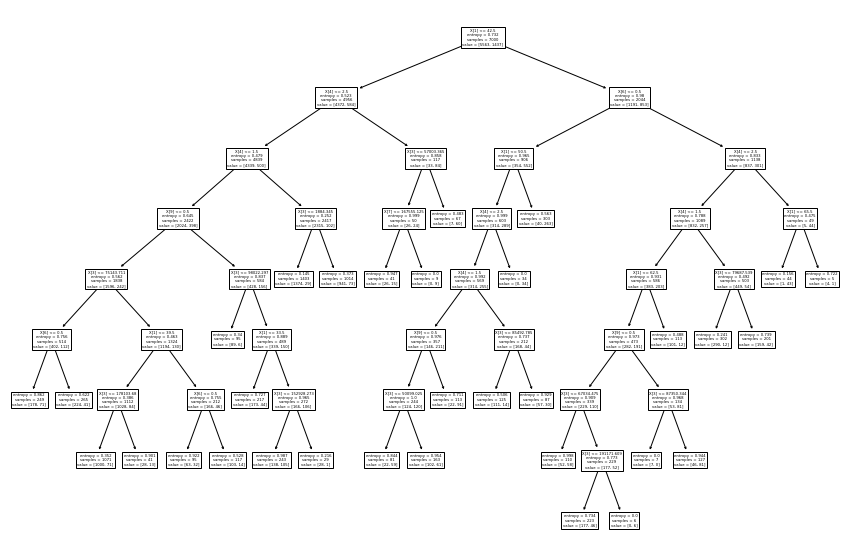

In [22]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(grid.best_estimator_);

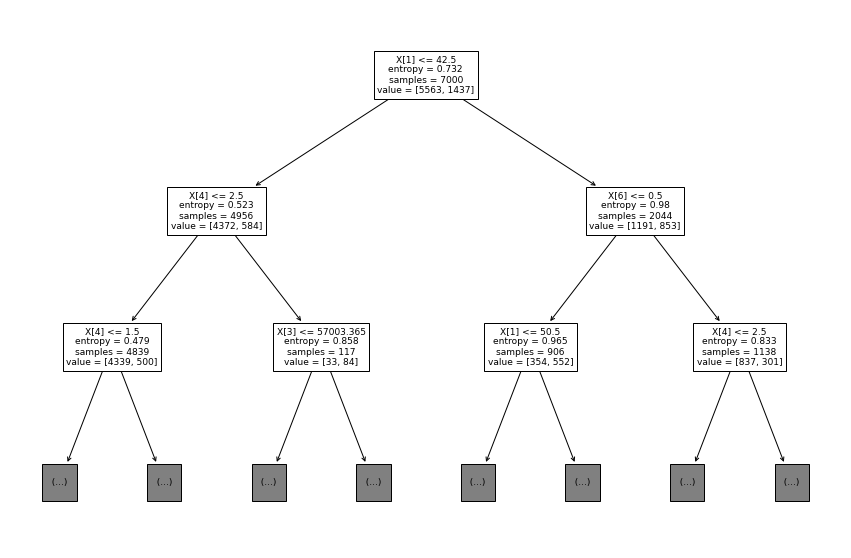

In [23]:
plt.figure(figsize=(15,10))
plot_tree(grid.best_estimator_, max_depth=2);

> Adicionando os nomes das colunas

In [24]:
X_treino.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

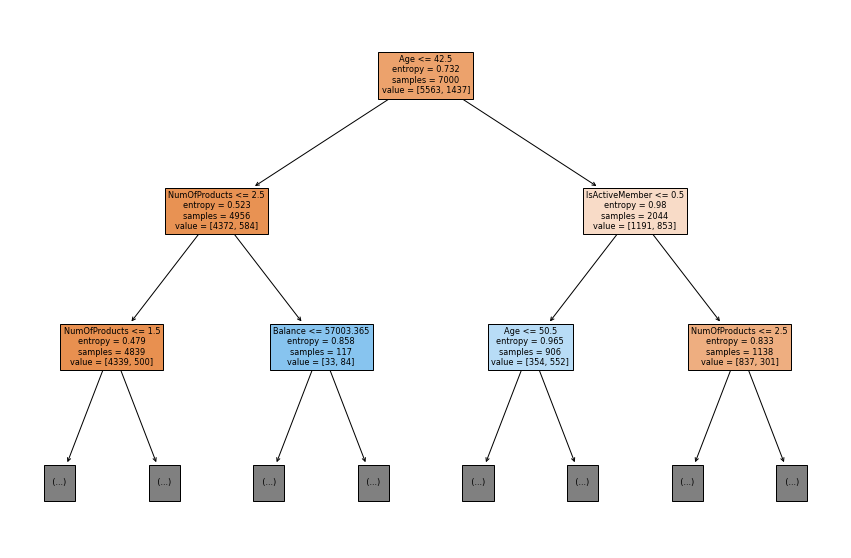

In [25]:
plt.figure(figsize=(15,10))
plot_tree(grid.best_estimator_, max_depth=2,
          feature_names=X_treino.columns, 
          filled=True);

# Feature Importance 

In [27]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=32,
                       random_state=61658)

In [28]:
grid.best_estimator_.feature_importances_

array([0.        , 0.39756168, 0.        , 0.12983555, 0.30706264,
       0.        , 0.11164571, 0.00618282, 0.        , 0.04771159,
       0.        , 0.        , 0.        ])

In [29]:
X_treino.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

### Deixando mais fácil de ver

In [40]:
importancias = grid.best_estimator_.feature_importances_
ordem = np.argsort(importancias)[::-1]  #[::-1] inverte a lista
colunas = X.columns

for col, imp in zip(colunas[ordem], importancias[ordem]):
    print(f'{col:30s}:{imp:.3f}')

Age                           :0.398
NumOfProducts                 :0.307
Balance                       :0.130
IsActiveMember                :0.112
Geography_Germany             :0.048
EstimatedSalary               :0.006
Gender_Male                   :0.000
Gender_Female                 :0.000
Geography_Spain               :0.000
Geography_France              :0.000
HasCrCard                     :0.000
Tenure                        :0.000
CreditScore                   :0.000


### Ajuda na análise preliminar

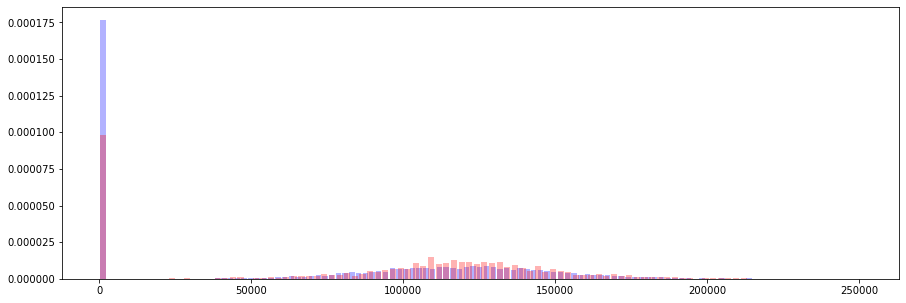

In [46]:
plt.figure(figsize=(15,5))

plt.hist(X.loc[y==0].Balance, bins=100, color='b', alpha=.3, rwidth=.8, density=True)
plt.hist(X.loc[y==1].Balance, bins=100, color='r', alpha=.3, rwidth=.8, density=True)

plt.show()

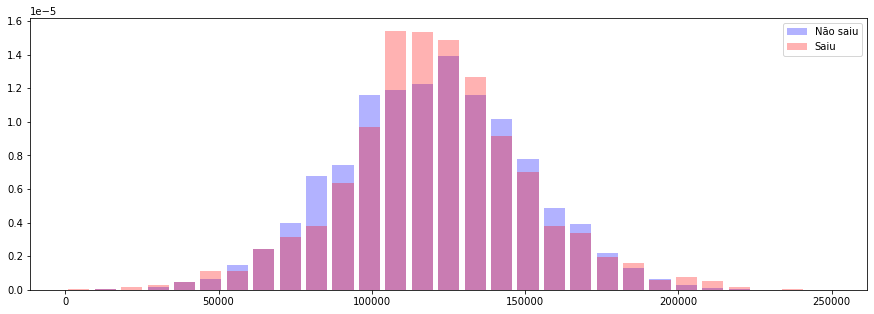

In [45]:
plt.figure(figsize=(15,5))

plt.hist(X.loc[y==0].Balance, bins=np.linspace(100,250000,30), color='b', alpha=.3, rwidth=.8, density=True, label='Não saiu')
plt.hist(X.loc[y==1].Balance, bins=np.linspace(100,250000,30), color='r', alpha=.3, rwidth=.8, density=True, label='Saiu')

plt.legend()

### Vamos fazer um modelo melhor com somente as variáveis selecionadas:

In [51]:
colunas_selecionadas = ['Age',
                        'NumOfProducts',
                        'Balance',
                        'IsActiveMember',
                        'Geography_Germany',
                        'EstimatedSalary'
                       ]

grid.fit(X_treino[colunas_selecionadas], y_treino)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10] END .criterion=gini, max_leaf_nodes=4;, score=0.756 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=4;, score=0.731 total time=   0.0s
[CV 3/10] END .criterion=gini, max_leaf_nodes=4;, score=0.756 total time=   0.0s
[CV 4/10] END .criterion=gini, max_leaf_nodes=4;, score=0.757 total time=   0.0s
[CV 5/10] END .criterion=gini, max_leaf_nodes=4;, score=0.762 total time=   0.0s
[CV 6/10] END .criterion=gini, max_leaf_nodes=4;, score=0.738 total time=   0.0s
[CV 7/10] END .criterion=gini, max_leaf_nodes=4;, score=0.715 total time=   0.0s
[CV 8/10] END .criterion=gini, max_leaf_nodes=4;, score=0.726 total time=   0.0s
[CV 9/10] END .criterion=gini, max_leaf_nodes=4;, score=0.730 total time=   0.0s
[CV 10/10] END criterion=gini, max_leaf_nodes=4;, score=0.756 total time=   0.0s
[CV 1/10] END .criterion=gini, max_leaf_nodes=8;, score=0.818 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=

[CV 9/10] END criterion=entropy, max_leaf_nodes=4;, score=0.730 total time=   0.0s
[CV 10/10] END criterion=entropy, max_leaf_nodes=4;, score=0.755 total time=   0.0s
[CV 1/10] END criterion=entropy, max_leaf_nodes=8;, score=0.818 total time=   0.0s
[CV 2/10] END criterion=entropy, max_leaf_nodes=8;, score=0.790 total time=   0.0s
[CV 3/10] END criterion=entropy, max_leaf_nodes=8;, score=0.830 total time=   0.0s
[CV 4/10] END criterion=entropy, max_leaf_nodes=8;, score=0.833 total time=   0.0s
[CV 5/10] END criterion=entropy, max_leaf_nodes=8;, score=0.817 total time=   0.0s
[CV 6/10] END criterion=entropy, max_leaf_nodes=8;, score=0.803 total time=   0.0s
[CV 7/10] END criterion=entropy, max_leaf_nodes=8;, score=0.798 total time=   0.0s
[CV 8/10] END criterion=entropy, max_leaf_nodes=8;, score=0.805 total time=   0.0s
[CV 9/10] END criterion=entropy, max_leaf_nodes=8;, score=0.781 total time=   0.0s
[CV 10/10] END criterion=entropy, max_leaf_nodes=8;, score=0.814 total time=   0.0s
[C

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=61658),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [4, 8, 16, 32, 64, 128, 256, 512,
                                            1024, 2048]},
             scoring='roc_auc', verbose=5)

#### Com todas as colunas, tinha dado: 0.8461416666666665 de AUC

In [50]:
y_pred2 = grid.predict_proba(X_teste[colunas_selecionadas])[:,1]

roc_auc_score(y_teste, y_pred2)

0.8453763888888887

Sem a variável `EstimatedSalary`, o modelo ficou um pouquinho pior: 
**AUC: 0.8453763888888887**

### Vamos adicioná-la novamente:

In [52]:
y_pred2 = grid.predict_proba(X_teste[colunas_selecionadas])[:,1]

roc_auc_score(y_teste, y_pred2)

0.8461416666666665

**AUC: 0.8461416666666665**

Igual o resultado dado com todas as colunas